## Assignment 3: $k$ Nearest Neighbor

**Q0 and Q1**

Hanna Svenson

**Q0.**
1. What is the difference between regression and classification?

Regression is for predicting numerical values, classification is for categorical variables.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion matrix cross-tabulates predicted and true values. This allows us to look for patterns in successes and failures. For example, which values tend to be predicted accurately and which don't, and for the cases that don't we can see what values they are mistakenly identified as. 

3. What does the SSE quantify about a particular model?

SSE is a measure of how far off the predicted values were from the actual values. As the square of the difference of predicted and actual values is taken, this "punishes" the far off guesses more harshly than the closer values. We want to minimize SSE to get a better model. 

4. What are overfitting and underfitting? 

Overfitting is when the model is too complex for the data, so models can "identify" patterns that don't actually exist. Underfitting is when the model is too simple for the data, so it fails to recognize the relevant patterns. 


5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

If we were to use the model in practice, we would want to know that it will predict values that are close to what we would see in real life. Therefore, to verify this, we would want to compare the actual output to the predicted output of the model for the same input. We cannot test the model with data it has already been trained on, as this would skew the results to look more accurate. This makes splitting a good idea, as we still use real data to train the model, but we keep test data separate for testing later on. SSE will tell us how far off the predicted values are from the real values, so this will help us find a model that has more reliable predictions. 


6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Labels are easier to read as we are given 1 predicted label for the inputs that it was given. However, a probability distribution- though maybe harder to read through- would be able to tell us the likeliness of each of the possible labels for that data input. This would tell us how certain the different predictions were, which would be good knowledge to have- for example we would be more hesitant in making decisions on the data if the predictions were split 34%, 33%, 33%. 



**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

There are no NAs to handle. The count of each variable is the same as the number of rows.

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage']]
print(df.head())
print(df.shape)
print(df.describe())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


2. Maxmin normalize `year` and `mileage`.

In [11]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

y = df['price'] # Create target variable vector
X = df.loc[:,['year','mileage']] # Create feature matrix
X = X.apply(maxmin) # Normalize X
X.head()

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

As k increases, the max values predicted for price decrease. We see the scale of the y axis on the plots change. 

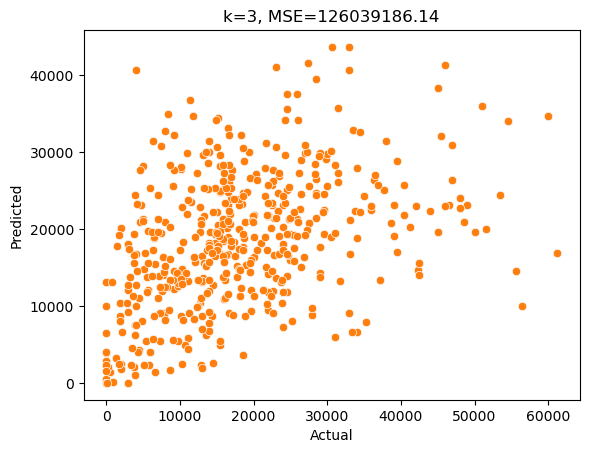

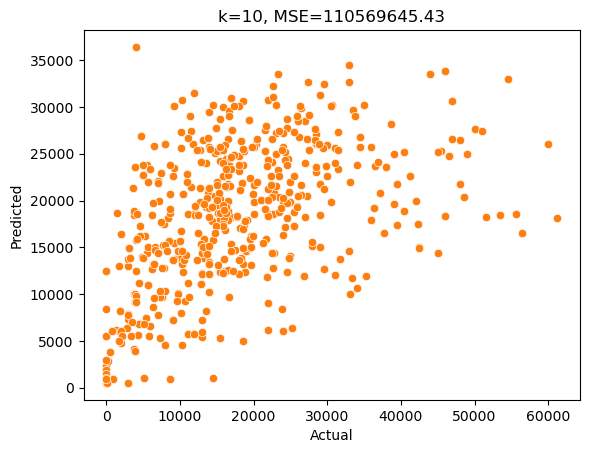

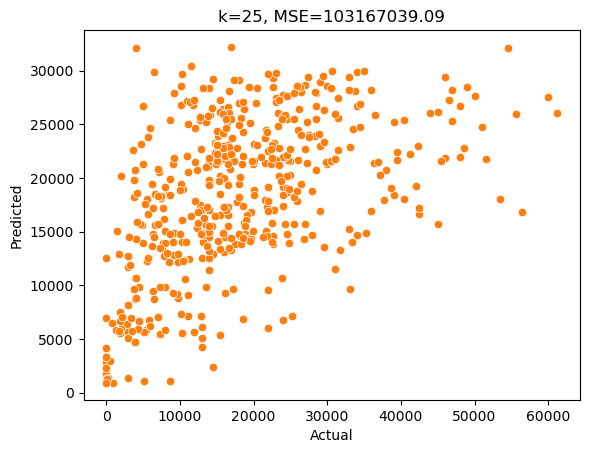

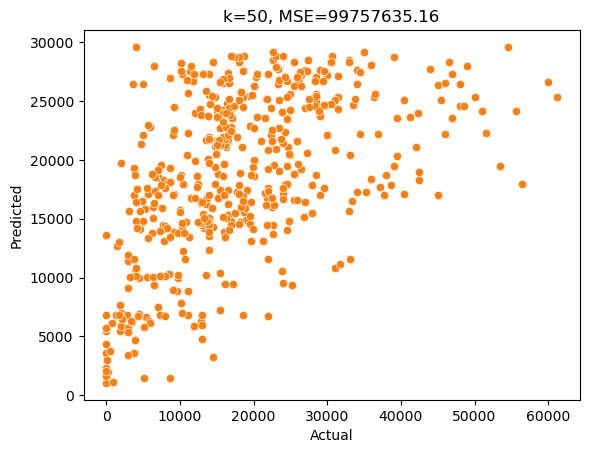

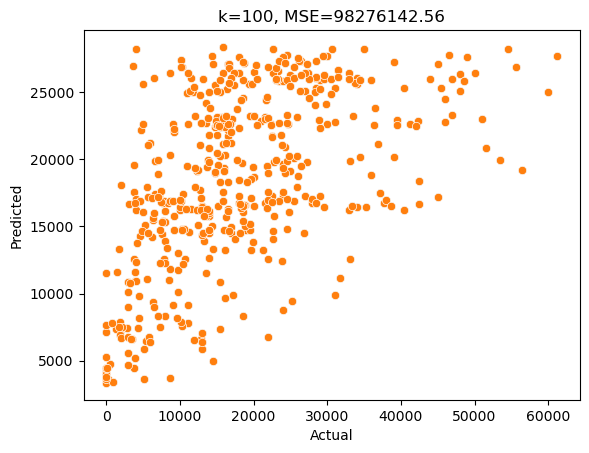

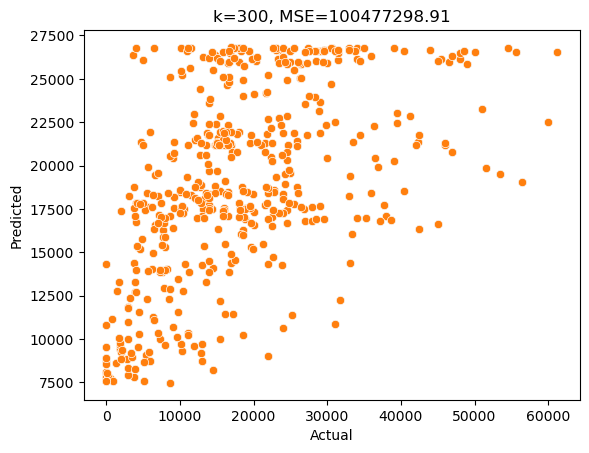

In [17]:
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    MSE = SSE / len(y_hat)
    
    plt.figure()
    sns.scatterplot(x=y_test,y=y_hat) 
    
    plot = sns.scatterplot(x=y_test,y=y_hat) 
    plt.title(f'k={k}, MSE={MSE:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

5. Determine the optimal $k$ for these data.

The optimal k is the k that provides the lowest SSE. This value was found to be k = 77.

[77]


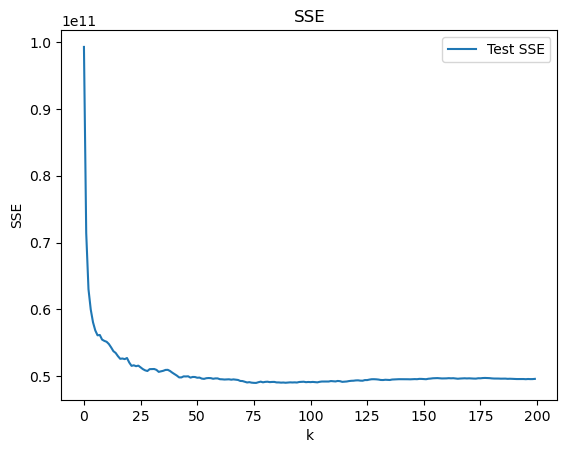

In [18]:
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here 
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In 6 we found that the optimal k was 77. Of the considered values [3,10,25,50,100,300] in our plot, it can therefore be inferred that k's of 3, 10 and 25 would cause underfitting, whereas k as 300 would be overfiting. In the plots for k is 50 and 100, we see that the density of points is more consistent, whereas the other examples tend to have areas of very dense points and areas with few points.